# Problem Statement

The high readmission level of hospital patients after they are discharged from the hospital is a significant concern for the health care system. The estimated cost of hospital readmissions is about $17.4 billion annually. While some readmissions are due to normal medical complications, such high readmission rates are generally viewed as symptomatic of deeper problems in the health care system, namely potential quality problems within hospitals, lack of coordination in follow-up care after discharge, and misaligned financial incentives to discharge patients early (see Reference: https://www.cms.gov/Medicare/Medicare-Fee-forServicePayment/AcuteInpatientPPS/Readmissions-Reduction-Program ).

To address the problem, the 2010 Affordable Care Act established a hospital readmissions reduction program (HRRP). The program created financial incentives for hospitals to reduce readmissions by linking Medicare reimbursements to a hospital’s risk-adjusted readmission rate. 
The initial phase of the HRRP, focused on three conditions: 
- Acute myocardial infarction (AMI), 
- heart failure (HF), 
- Pneumonia

Hospitals that had a three-year rolling readmission rate for these conditions that exceeded their risk adjusted target were to be penalized a portion of their Medicare reimbursements. 
For 2012, penalties could be as much 1\% of the total reimbursements a hospital received for the three target conditions. 
In the first year of the program, 2225 hospitals were subject to reduced payment penalties, with  penalties totaling $225 million nationwide. The maximum penalties were set to increase to 3% of reimbursements by 2014.

Approximately 20% of healthcare systems provider were insurance reimbursements from Medicare for the three conditions (acute myocardial infarction, heart failure, and pneumonia) covered by the HRRP.
 A significant portion of the healthcare systems provider’s revenue could be at risk due to HRRP penalties.
The concern over the impact of HRRP penalties over the coming years, healthcare systems providers started to look into the hospitals readmission rate within 30 days to come up them with a good strategy. 

Data on all admissions over the last three years for patient is provided with data dictionary. What insights you could glean from the data and what recommendations you could make. 

## Data Dictionary

- age: Age at time of admission
- female: 1 = Female, 0=Male
- flu_season: Flu Season (1 = Yes). Admission starting December through March
- ed_admit: Admitted through the ED (1 = Yes).
- severity score: Generic physiologic severity of illness score based on lab tests and vital signs
- comorbidity score: Severity score based on patients’ pre-existing diagnoses.
- readmit30: Indicator for hospital readmission within 30 days. 1 if readmitted, 0 otherwise.

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score,precision_recall_curve,plot_precision_recall_curve,f1_score,accuracy_score,roc_auc_score


# Data Set

In [4]:
df=pd.read_csv('readmission.csv')
df.head()


,age,female,flu_season,ed_admit,severity score,comorbidity score,readmit30
0,100,1,1,1,38,112,0
1,83,1,0,1,8,109,1
2,74,0,1,0,1,80,0
3,66,1,1,1,25,4,0
4,68,1,1,1,25,32,0


 ### what percentage of  patients readmited in 30 days?

In [5]:
print(df['readmit30'].value_counts(normalize=False),'\n')

print(df['readmit30'].value_counts(normalize=True))


0    3384
1     998
Name: readmit30, dtype: int64 

0    0.77225
1    0.22775
Name: readmit30, dtype: float64


22.8 % of patients were readmitted in 30 days which is a very large and suprising number. Out of the 4382 patients, 998 of them were readmitted withing 30 days.

### Is there dependency between readmition in 30 days and Flu season at 95% confidence level? 

chi-squre test value is 64.74   and   p value is 2.9153013948676207e-13
Reject H0: Patient readmit depends on flu season


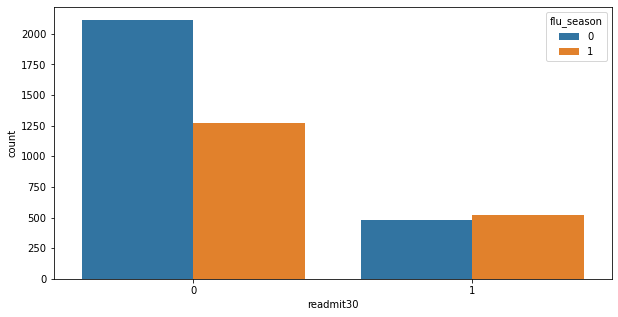

In [6]:
fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(x='readmit30',hue='flu_season',data=df)

## Chi-square test 
data=pd.crosstab(index=df["readmit30"], columns=df["flu_season"], margins=True, normalize=False).round(2)

stat, p, dof, expected = chi2_contingency(data)
alpha = 0.05

print("chi-squre test value is " + str(stat.round(2)), "  and  ","p value is " + str(p))
if p <= alpha:
    print('Reject H0: Patient readmit depends on flu season')
else:
    print('Fail to reject H0: Patient readmit does not depends on flu season')

# Logistic Regression
1. Apply proper data pre-processing based on the discussion in the class
2. Split data to train and test set 
3. Use Training dataset to fit Logistic Regression
4. Comment on significance of predictors
5. Comment on main driver(s)
6. Interpret the effect of sex and comorbidity score on the 30 days readmition  
7. Use testset and comment on performance of the model (confusion matrix) at .5 threshold 
8. Use testset and comment on performance of the model (confusion matrix) at optimal threshold 

# KNN Classification
1. Apply proper data pre processing based on the discussion in the class
2. Split data to train and test set 
3. Apply cross validation using train set to find optimal number of neighbours 
4. Use testset and comment on performance of the model (confusion matrix) at .5 threshold 
5. Use testset and comment on performance of the model (confusion matrix) at optimal threshold 

# Compare KNN and Logistic regression prediction power using ROC/AUC/F1 Score 

# Provide business insight from your data and models to reduce readmission rate 

In [7]:
## Data pre-processing
df.describe()


,age,female,flu_season,ed_admit,severity score,comorbidity score,readmit30
count,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,76.847330,0.469192,0.408033,0.809220,22.353263,94.735509,0.227750
std,7.904949,0.499107,0.491525,0.392961,18.005320,57.145155,0.419428
min,65.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,70.000000,0.000000,0.000000,1.000000,8.000000,51.000000,0.000000
50%,76.000000,0.000000,0.000000,1.000000,19.000000,86.000000,0.000000
75%,82.000000,1.000000,1.000000,1.000000,32.000000,131.000000,0.000000
max,105.000000,1.000000,1.000000,1.000000,112.000000,322.000000,1.000000


In [8]:
## Renaming severity score and comorbidity score so we can run a GLM.
df.rename({'severity score':'severity_score','comorbidity score':'comorbidity_score'},inplace = True, axis=1)
df.head()

,age,female,flu_season,ed_admit,severity_score,comorbidity_score,readmit30
0,100,1,1,1,38,112,0
1,83,1,0,1,8,109,1
2,74,0,1,0,1,80,0
3,66,1,1,1,25,4,0
4,68,1,1,1,25,32,0


In [9]:
## Split data into train and test set

xvalues = ['age','female','flu_season','ed_admit','severity_score','comorbidity_score']

X=df[xvalues].values
y=df['readmit30'].values

# split into 80:20 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,stratify=y)



In [10]:
## Training model for GLM using a poisson distribution since severity and comorbidity score are not binomial

df_train=pd.DataFrame(np.column_stack((X_train, y_train)),columns = xvalues+['readmit30'])
df_train['readmit30']=df_train['readmit30'].astype(int)
df_test=pd.DataFrame(np.column_stack((X_test, y_test)),columns = xvalues+['readmit30'])
df_test['readmit30']=df_test['readmit30'].astype(int)


for col in ['age','severity_score','comorbidity_score']:
        df_train[col]=df_train[col].astype('float')
        df_test[col]=df_test[col].astype('float')
        
for col in ['female','flu_season','ed_admit']:
        df_train[col]=df_train[col].astype('str')
        df_test[col]=df_test[col].astype('str')

In [11]:
formula = 'readmit30 ~ age + female + flu_season + ed_admit + severity_score + comorbidity_score'

model = smf.glm(formula = formula, data=df_train, family=sm.families.Binomial(link= sm.families.links.logit()))

result_GLM = model.fit()
print(result_GLM.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              readmit30   No. Observations:                 3505
Model:                            GLM   Df Residuals:                     3498
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1510.6
Date:                Mon, 17 Oct 2022   Deviance:                       3021.2
Time:                        12:43:48   Pearson chi2:                 3.40e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1902
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -4.0750      0.46

### Comment on signifigance of predictors
The features flu_season, severity score, and comorbidity score are all statistically signifigant at a 1% and 5% signifignace level. This means that flu season, the severity score, and the comorbidity score of a patient all affect the probability that a patient is readmitted to the hospital after 30 days. All their coefficients are positive meaning that all 3 factors increase the probability of readmission. Patients who are older, who have more serious geriatric conditions, and who have more serious pre-existing conditions have a higher chance of being readmitted.

### Comment on main driver(s)
The flu season seems to be a main driver of readmittance with a large coefficient of 0.7836 and statistical signifignace at 1%. Patients in flu season have a much higher chance of being readmitted within 30 days compared to patients outside flu season. While the coefficient of the comorbidity score is low, this may also be a main driver since the mean comorbidity score is 94.7 this means that comorbidity's average coefficient for is 1.56

### Interpret the effect of sex and comorbidity score on the 30 days readmition
The effect of sex on hospital readmittance is high however the p-value of 0.256 is not low enough to be statistically signifigant. This means that sex cannot be statistically proven to increase the change of readmission for patients.
The comorbidity score is highly statistically signifigant with a low coefficient. Since the comorbidity score has a mean of 94.7 it is a big driver of readmittance among hospital patients.

## Use testset and comment on performance of the model (confusion matrix) at .5 threshold

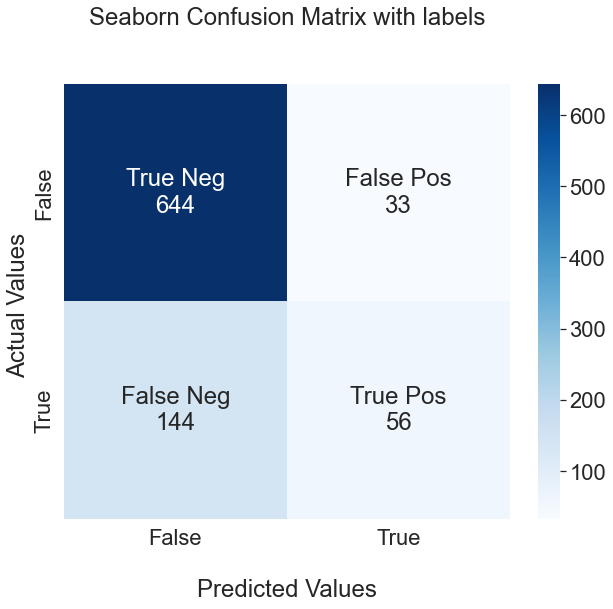

Precision: 0.63
Recall: 0.28
Accuracy: 0.8
F1-score: : 0.39


In [12]:
## Use testset and comment on performance of the model (confusion matrix) at .5 threshold
predictions = result_GLM.predict(df_test)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]

#############Plot confusion matrix
cf_matrix=confusion_matrix(df_test["readmit30"],  predictions_nominal)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.set(rc = {'figure.figsize':(10,8)})
sns.set(font_scale = 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()


precision = precision_score(df_test["readmit30"],  predictions_nominal)
recall = recall_score(df_test["readmit30"],  predictions_nominal)
accuracy= accuracy_score(df_test["readmit30"],  predictions_nominal)
F1_score= f1_score(df_test["readmit30"],  predictions_nominal)


print('Precision: {}'.format(round(precision,2)))
print('Recall: {}'.format(round(recall,2)))
print('Accuracy: {}'.format(round(accuracy,2)))
print('F1-score: : {}'.format(round(F1_score,2)))

While the precision and accuracy of the model is high, the recall is very high. This means that we are correctly predicting
who will be readmitted however the model does not do a good job at identifying a large portion of patient who will be readmitted. The cost of a false negative is higher in this case because we do not want patients readmitted so the F1 score is not as useful.

## Use testset and comment on performance of the model (confusion matrix) at optimal threshold

Area under the ROC curve : 0.746233


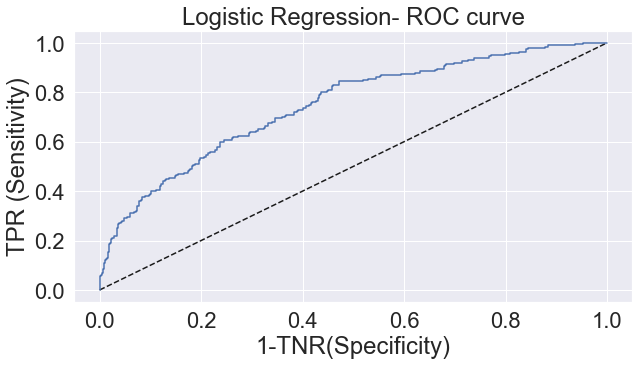

          fpr    tpr     1-fpr  difference  thresholds
0    0.000000  0.000  1.000000   -1.000000    1.941693
1    0.000000  0.005  1.000000   -0.995000    0.941693
2    0.000000  0.035  1.000000   -0.965000    0.835258
3    0.001477  0.035  0.998523   -0.963523    0.834182
4    0.001477  0.055  0.998523   -0.943523    0.814499
..        ...    ...       ...         ...         ...
255  0.936484  0.990  0.063516    0.926484    0.039073
256  0.936484  0.995  0.063516    0.931484    0.038926
257  0.952733  0.995  0.047267    0.947733    0.034525
258  0.952733  1.000  0.047267    0.952733    0.033984
259  1.000000  1.000  0.000000    1.000000    0.017005

[260 rows x 5 columns]
          fpr    tpr     1-fpr  difference  thresholds
151  0.330871  0.665  0.669129   -0.004129    0.213424


[Text(-50.0, 0, ''),
 Text(0.0, 0, ''),
 Text(50.0, 0, ''),
 Text(100.0, 0, ''),
 Text(150.0, 0, ''),
 Text(200.0, 0, ''),
 Text(250.0, 0, ''),
 Text(300.0, 0, '')]

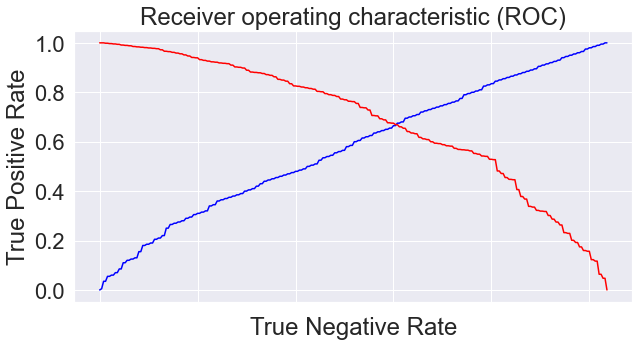

In [13]:
fpr, tpr, thresholds =roc_curve(df_test["readmit30"], predictions)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

fig, ax = plt.subplots(figsize=(10,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('1-TNR(Specificity)')
plt.ylabel('TPR (Sensitivity)')
plt.title('Logistic Regression- ROC curve')
plt.show()

## Use testset and comment on performance of the model (confusion matrix) at optimal threshold
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'difference' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
print(roc)
##
print(roc.iloc[(roc.difference-0).abs().argsort()[:1]])

# Plot tpr vs 1-fpr
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(roc['tpr'],color='blue')
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
ax.set_xticklabels([])

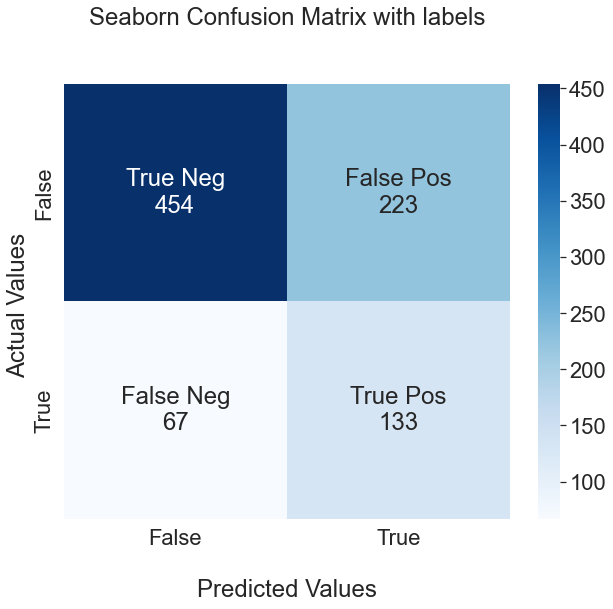

Precision: 0.37
Recall: 0.66
Accuracy: 0.67
F1-score: : 0.48


In [14]:
# Setting optimal threshhold to 0.21
predictions_nominal = [ 0 if x < 0.213424 else 1 for x in predictions]


#############Plot confusion matrix
cf_matrix=confusion_matrix(df_test["readmit30"],  predictions_nominal)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.set(rc = {'figure.figsize':(10,8)})
sns.set(font_scale = 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()


precision = precision_score(df_test["readmit30"],  predictions_nominal)
recall = recall_score(df_test["readmit30"],  predictions_nominal)
accuracy= accuracy_score(df_test["readmit30"],  predictions_nominal)
F1_score= f1_score(df_test["readmit30"],  predictions_nominal)


print('Precision: {}'.format(round(precision,2)))
print('Recall: {}'.format(round(recall,2)))
print('Accuracy: {}'.format(round(accuracy,2)))
print('F1-score: : {}'.format(round(F1_score,2)))

Compared to the 0.5 threshhold, the recall is signifigantly higher meaning we have less false negatives. Assuming equal cost, the optimal threshold would be the best option however the cost of a false positive versus false negative is different.
While the model trades this off for a higher false positive rate, in this context, the cost of a false positive is far less than a false negative which means the optimal threshhold does do a better job predicting.

# KNN CLASSIFICATION

In [15]:
# Preparing Data for KNN
for col in ['age','severity_score','comorbidity_score','female','flu_season','ed_admit']:
        df_train[col]=df_train[col].astype('float')
        df_test[col]=df_test[col].astype('float')


In [16]:

cols=['female','flu_season','ed_admit']
df1 = pd.get_dummies(df[cols])


scaler = StandardScaler()
df2 = pd.DataFrame(scaler.fit_transform(df[['age','severity_score','comorbidity_score']],),columns=['age','severity_score','comorbidity_score'])

X = df1.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)

y=df['readmit30']

In [17]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [25]:
#create a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 10)}

#use gridsearch to test all values for n_neighbors using 5-fold cross validation
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

[Text(-2.0, 0, ''),
 Text(0.0, 0, ''),
 Text(2.0, 0, ''),
 Text(4.0, 0, ''),
 Text(6.0, 0, ''),
 Text(8.0, 0, ''),
 Text(10.0, 0, '')]

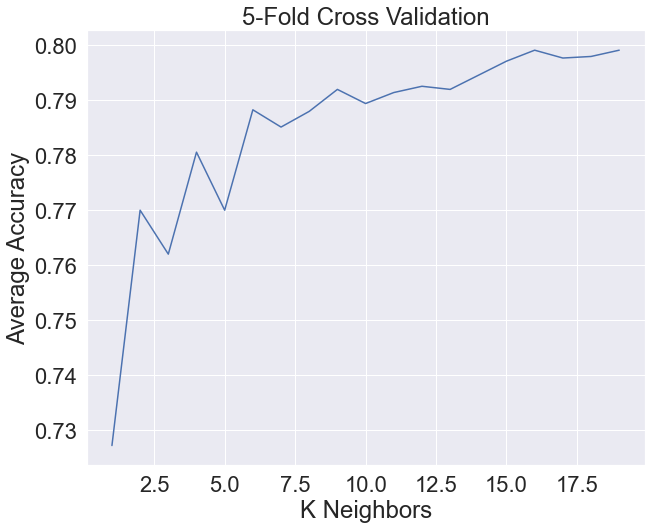

In [26]:
k_fold_result = pd.DataFrame()
k_fold_result['k'] = np.arange(1, 10)
k_fold_result['mean_test_score'] = list(knn_gscv.cv_results_['mean_test_score'])
plt.plot(k_fold_result['k'],k_fold_result['mean_test_score'])
plt.xlabel('K Neighbors')
plt.ylabel('Average Accuracy')
plt.title('5-Fold Cross Validation')
ax.set_xticklabels([])


In [20]:
print('Best parameters: Number of neighbors is ', knn_gscv.best_params_)
print('Model accuracy (score) is:' , knn_gscv.best_score_)

Best parameters: Number of neighbors is  {'n_neighbors': 9}
Model accuracy (score) is: 0.7920114122681884


### Use testset and comment on performance of the model (confusion matrix) at .5 threshold

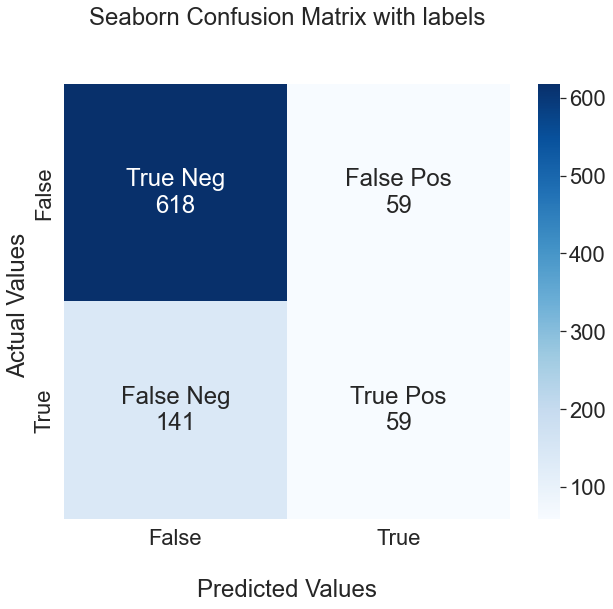

Precision: 0.5
Recall: 0.3
Accuracy: 0.77
F1-score: : 0.37


In [21]:
predictions = knn_gscv.predict(X_test)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]

## Confusion matrix
cf_matrix=confusion_matrix(y_test,  predictions_nominal)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.set(rc = {'figure.figsize':(10,8)})
sns.set(font_scale = 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()


precision = precision_score(y_test,  predictions_nominal)
recall = recall_score(y_test,  predictions_nominal)
accuracy= accuracy_score(y_test,  predictions_nominal)
F1_score= f1_score(y_test,  predictions_nominal)


print('Precision: {}'.format(round(precision,2)))
print('Recall: {}'.format(round(recall,2)))
print('Accuracy: {}'.format(round(accuracy,2)))
print('F1-score: : {}'.format(round(F1_score,2)))

The KNN classification at the 0.5 threshold does not predict as well at the GLM when the cost of a false positive and false negative are the same. Similar to the 0.5 threshold of the GLM model, the precision and accuracy are relatively higher than the recall meaning that the model has a large number of false negatives compared to the number of combined false negatives and true positives. 

### Use testset and comment on performance of the model (confusion matrix) at optimal threshold

Finding optimal threshold where TPR = TNR

In [22]:
y_pred_proba = knn_gscv.predict_proba(X_test)[:,1]
y_test = y_test.astype(int)
fpr, tpr, thresholds =roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.697681


        fpr    tpr     1-fpr  difference  thresholds
0  0.000000  0.000  1.000000   -1.000000    1.888889
1  0.008863  0.025  0.991137   -0.966137    0.888889
2  0.025111  0.085  0.974889   -0.889889    0.777778
3  0.042836  0.155  0.957164   -0.802164    0.666667
4  0.087149  0.295  0.912851   -0.617851    0.555556
5  0.153619  0.395  0.846381   -0.451381    0.444444
6  0.252585  0.570  0.747415   -0.177415    0.333333
7  0.410635  0.700  0.589365    0.110635    0.222222
8  0.670606  0.875  0.329394    0.545606    0.111111
9  1.000000  1.000  0.000000    1.000000    0.000000
        fpr  tpr     1-fpr  difference  thresholds
7  0.410635  0.7  0.589365    0.110635    0.222222


[Text(-2.0, 0, ''),
 Text(0.0, 0, ''),
 Text(2.0, 0, ''),
 Text(4.0, 0, ''),
 Text(6.0, 0, ''),
 Text(8.0, 0, ''),
 Text(10.0, 0, '')]

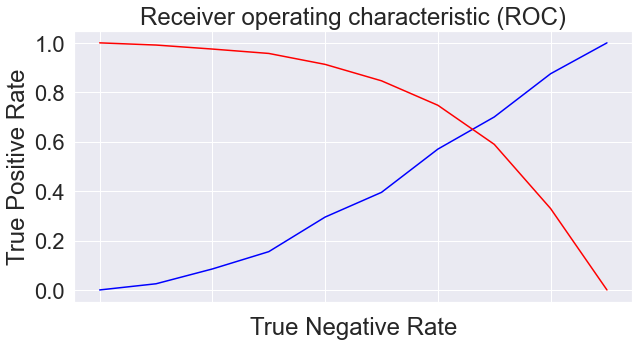

In [23]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'difference' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
print(roc)
##
print(roc.iloc[(roc.difference-0).abs().argsort()[:1]])

# Plot tpr vs 1-fpr
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(roc['tpr'],color='blue')
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
ax.set_xticklabels([])


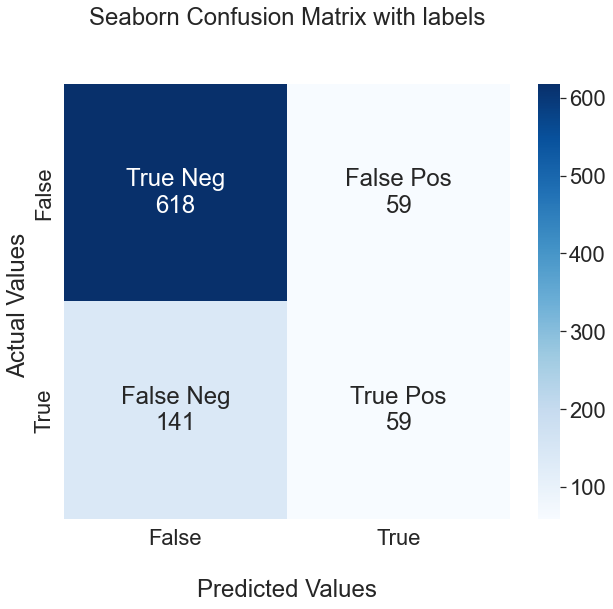

Precision: 0.5
Recall: 0.3
Accuracy: 0.77
F1-score: : 0.37


In [66]:
predictions_nominal = [ 0 if x < 0.222222 else 1 for x in predictions]


#############Plot confusion matrix
cf_matrix=confusion_matrix(y_test,  predictions_nominal)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.set(rc = {'figure.figsize':(10,8)})
sns.set(font_scale = 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()


precision = precision_score(y_test,  predictions_nominal)
recall = recall_score(y_test,  predictions_nominal)
accuracy= accuracy_score(y_test,  predictions_nominal)
F1_score= f1_score(y_test,  predictions_nominal)


print('Precision: {}'.format(round(precision,2)))
print('Recall: {}'.format(round(recall,2)))
print('Accuracy: {}'.format(round(accuracy,2)))
print('F1-score: : {}'.format(round(F1_score,2)))

At the optimal threshold of 0.222222, all the measures of accuracy of the confusion matrix are exactly the same as the 0.5 threshold. In this KNN model, changing the threshold did not change how well the model performs in it's predictions.